## SIR Model

The SIR model is one of the simplest models of infection dynamics. It compartmentalises the population into three compartments.
### Susceptible ($S$)
### Infectious ($I$)
### Recovered ($R$)
### Dead ($D$)
For a fixed population the total number in population is constant.
### $N=S+I+R+D$
The dynamics of $S$ and $I$ are described by the equations:
### $\frac{dS}{dt}=-\frac{\beta I}{N}S + \psi R$
### $\frac{dI}{dt}=\frac{\beta I}{N}S - \gamma I - \delta I$
### $\frac{dR}{dt}=\gamma I - \psi R$
### $\frac{dD}{dt}=\delta I$

###β = infection rate

###The recovery rate (γ): typically less than 1 for most diseases. γ is meant to represent the rate of recovery per day: A typical γ could be the inverse of the average duration of infection, say 10 days, which would be γ = 1/10 = 0.1.

###The death rate (δ): A value of 0.1 means 10% of the infected population dies each day, which is extremely high for most diseases.
### (*The mortality rate of covid. in france is approximately 0.418%)


###The rate of re infection (Ψ: Psi is set to a value that reflects the duration of immunity, for example, if immunity lasts 100 days on average, Ψ = 1/100 = 0.01



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from sympy import symbols, Matrix
from numpy import linspace, array

import pylab as pl
import numpy as np
import scipy.io as sp_io
import sys
import scipy.stats as sp_st
import matplotlib.pyplot as plt
import importlib
import matplotlib.cm as cm

import seaborn as sns
import networkx as nx
import glob as glob
import pandas as pd

Eigenvalues:  [ 0.     -0.01    0.1897]


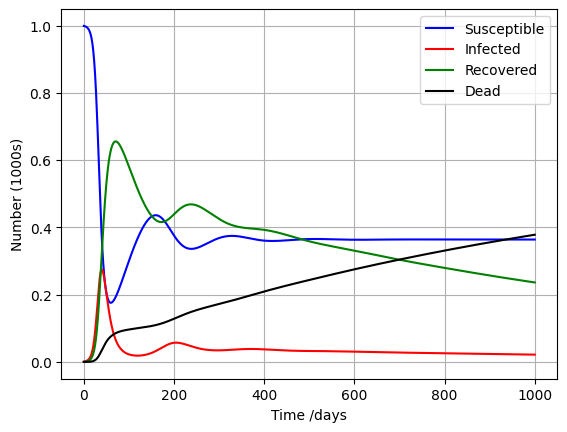

For N=1000, I_init=1, beta (Infection Rate)=0.3, gamma (rate of recovery)=0.1, delta (death rate)=0.01, Psi (immunity loss rate)=0.01


In [ ]:

# initial conditions
N = 1000
I_init, R_init, D_init = 1, 0, 0
S_init = N - I_init - R_init - D_init

# Parameters
beta = 0.3   #infectious person has a 30% chance of transmitting the disease to a susceptible individual
gamma = 0.1  #10 days of infection
delta = 0.01 # 1% of mortality
Psi = 0.01  #Immunity lasts 100 days


#Jacobian Matrix at equilibrium (I=0, R=0)
J_eq = np.array([[0 , -beta * S_init / N , Psi] ,
              [ 0 , (beta * S_init/ N ) - gamma - delta , 0 ],
              [ 0, gamma , - Psi ]])


eigenvalues, _ = np.linalg.eig(J_eq)
print("Eigenvalues: ", eigenvalues)

# Time grid
t = np.linspace(0, 1000, 1000)

# Initial conditions vector including D_init
y0 = S_init, I_init, R_init, D_init

# Model function
def SIRD_eqns(y, t, N, beta, gamma, delta, Psi):
    S, I, R, D = y
    dSdt = -beta * S * I / N + Psi * R
    dIdt = beta * S * I / N - gamma * I - delta * I
    dRdt = gamma * I - Psi * R
    dDdt = delta * I
    return dSdt, dIdt, dRdt, dDdt

# Integrate the equations over the time grid, t.
result = odeint(SIRD_eqns, y0, t, args=(N, beta, gamma, delta, Psi))
S, I, R, D = result.T  # Extracting the values

# Plot the data including D(t)
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(t, S/1000, 'b', label='Susceptible')
ax.plot(t, I/1000, 'r', label='Infected')
ax.plot(t, R/1000, 'g', label='Recovered')
ax.plot(t, D/1000, 'k', label='Dead')  # Plotting the Dead compartment
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
legend = ax.legend()
plt.grid(True)
plt.show()


# Display updated parameters
print(f"For N={N}, I_init={I_init}, beta (Infection Rate)={beta}, gamma (rate of recovery)={gamma}, delta (death rate)={delta}, Psi (immunity loss rate)={Psi}")


In [ ]:
from sympy import symbols, Function, Matrix

# Define the symbols
S, I, R, D, β, γ, δ, ψ, N = symbols('S I R D β γ δ ψ N')

# Define the functions for the SIRD model
f1 = -β * I / N * S + ψ * R
f2 = β * I / N * S - γ * I - δ * I
f3 = γ * I - ψ * R
f4 = δ * I

# Create the matrix of functions
F = Matrix([f1, f2, f3, f4])

# Define the vector of variables
variables = Matrix([S, I, R, D])

# Calculate the Jacobian matrix
Jacobian = F.jacobian(variables)
Jacobian



Matrix([
[-I*β/N,         -S*β/N,  ψ, 0],
[ I*β/N, -γ - δ + S*β/N,  0, 0],
[     0,              γ, -ψ, 0],
[     0,              δ,  0, 0]])

In [ ]:
#Jacobian Matrix at equilibrium (I=0, R=0)
Jeq = np.array([[0 , -beta * S / N , Psi] ,
              [ 0 , (beta * S/ N ) - gamma - delta , 0 ],
              [ 0, gamma , - Psi ]])
Jeq

array([[0, -0.3*S/N, 0.01],
       [0, -0.11 + 0.3*S/N, 0],
       [0, 0.1, -0.01]], dtype=object)

###To remeber: A bifurcation occurs when the real part of an eigenvalue crosses zero.

###Let's try varying Gamma and see what happens to the eigenvalues

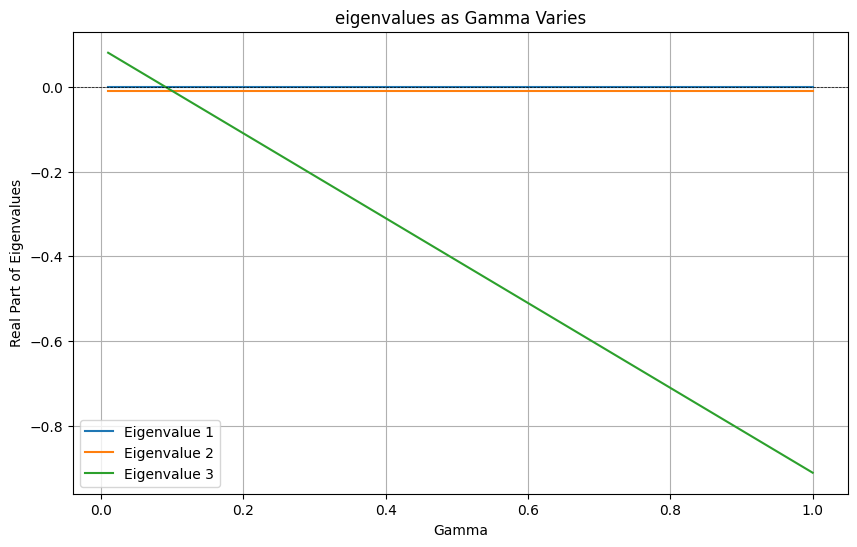

In [ ]:
# Define initial conditions and parameters
N = 1000
I_init, R_init, D_init = 1, 0, 0
S_init = N - I_init - R_init - D_init

beta = 0.1   #infectious person has a 10% chance of transmitting the disease to a susceptible individual
delta = 0.01 # 1% of mortality
Psi = 0.01  #Immunity lasts 100 days


# Define a range of gamma values to study the bifurcation
gamma_values = np.linspace(0.01, 1, 100)

# Prepare a list to hold the eigenvalues for each gamma
eigenvalues = []

# Analyzing the Jacobian at equilibrium for each gamma value
for gamma in gamma_values:
    # At equilibrium, we consider I and R to be zero
    S_eq = N - D_init  # Since I and R are zero, all the rest are susceptible minus initial deceased
    # the Jacobian matrix at equilibrium:
    J_eq = np.array([
        [0, -beta * S_eq / N, Psi],
        [0, (beta * S_eq / N) - gamma - delta, 0],
        [0, gamma, -Psi]
    ])
    # Calculate eigenvalues and store them
    eig_vals = np.linalg.eigvals(J_eq)
    eigenvalues.append(eig_vals)

# Convert the list of eigenvalues to a NumPy array for easier plotting
eigenvalues = np.array(eigenvalues)

# Plot the real parts of the eigenvalues as gamma varies
plt.figure(figsize=(10, 6))
for i in range(eigenvalues.shape[1]):
    plt.plot(gamma_values, eigenvalues[:, i].real, label=f'Eigenvalue {i+1}')

plt.title('eigenvalues as Gamma Varies')
plt.xlabel('Gamma')
plt.ylabel('Real Part of Eigenvalues')
plt.axhline(0, color='black', lw=0.5, ls='--')  # Add a horizontal line at 0
plt.legend()
plt.grid(True)
plt.show()



###Now let's try varying beta

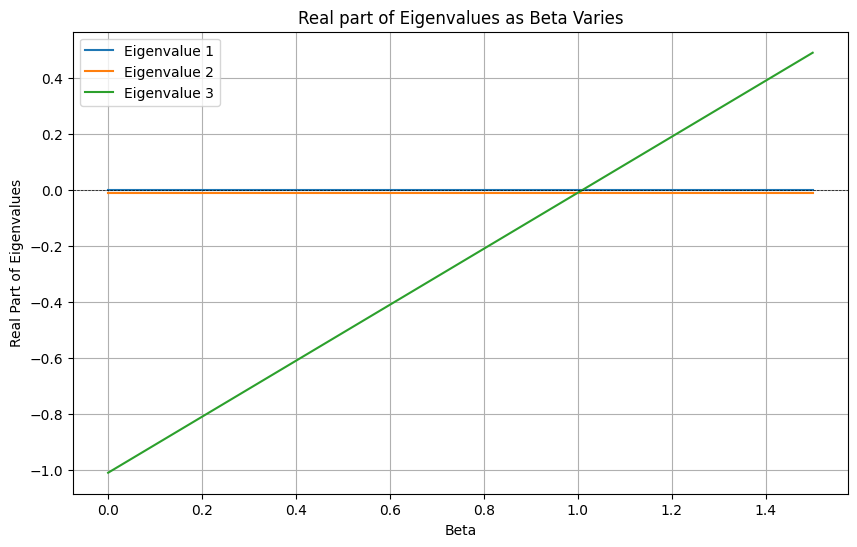

In [ ]:
# Define a range of beta values to study the bifurcation
beta_values = np.linspace(0.001, 1.5, 1000)

# Prepare a list to hold the eigenvalues for each beta
eigenvalues_beta = []

# Analyze the Jacobian matrix at equilibrium for each beta value
for beta in beta_values:
    # At equilibrium, we consider I and R to be zero
    S_eq = N - D_init  # Since I and R are zero, all the rest are susceptible minus initial deceased
    # the Jacobian matrix at equilibrium:
    J_eq = np.array([
        [0, -beta * S_eq / N, Psi],
        [0, beta * S_eq / N - gamma - delta, 0],
        [0, gamma, -Psi]
    ])
    # Calculate eigenvalues and store them
    eig_vals = np.linalg.eigvals(J_eq)
    eigenvalues_beta.append(eig_vals)

# Convert the list of eigenvalues to a NumPy array for easier plotting
eigenvalues_beta = np.array(eigenvalues_beta)

# Plot the real parts of the eigenvalues as beta varies
plt.figure(figsize=(10, 6))
for i in range(eigenvalues_beta.shape[1]):
    plt.plot(beta_values, eigenvalues_beta[:, i].real, label=f'Eigenvalue {i+1}')

plt.title('Real part of Eigenvalues as Beta Varies')
plt.xlabel('Beta')
plt.ylabel('Real Part of Eigenvalues')
plt.axhline(0, color='black', lw=0.5, ls='--')  # Add a horizontal line at 0
plt.legend()
plt.grid(True)
plt.show()



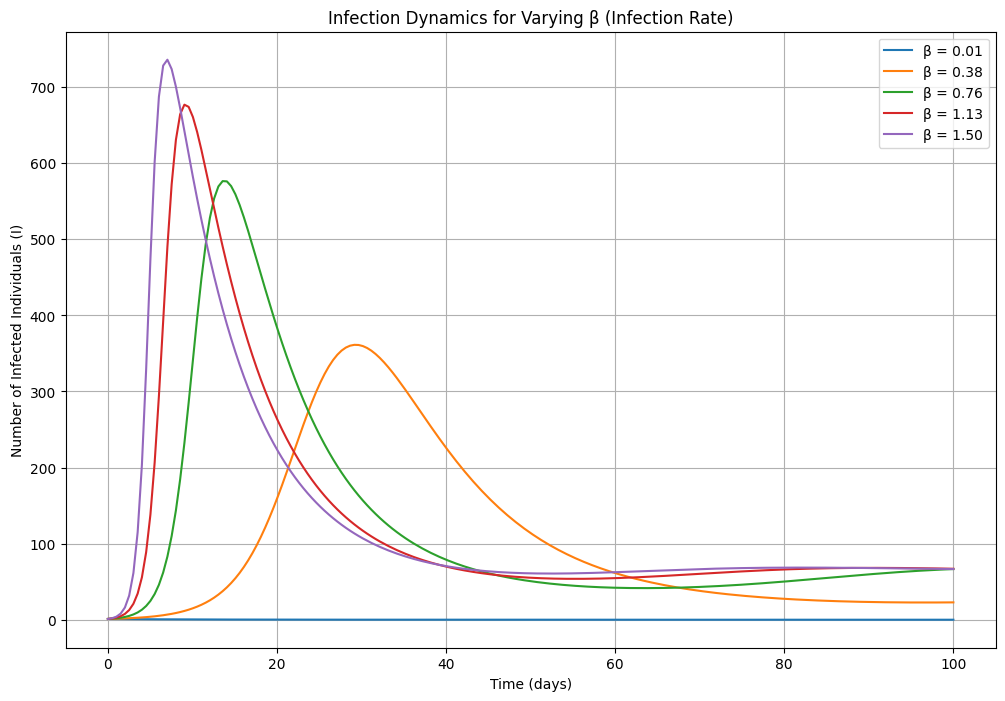

In [ ]:
# Define the modified SIR model equations
def SIRD_eqns(y, t, N, beta, gamma, delta, Psi):
    S, I, R, D = y
    dSdt = -beta * S * I / N + Psi * R
    dIdt = beta * S * I / N - gamma * I - delta * I
    dRdt = gamma * I - Psi * R
    dDdt = delta * I
    return dSdt, dIdt, dRdt, dDdt

# Initial conditions
N = 1000
I_init, R_init, D_init = 1, 0, 0
S_init = N - I_init - R_init - D_init

# Parameters for the bifurcation analysis
beta_values = np.linspace(0.01, 1.5, 5)  # Varying beta
gamma = 0.1
delta = 0.01
Psi = 0.01

# Time vector for the simulation
t = np.linspace(0, 100, 200)  # From day 0 to day 100

# Prepare the plot
plt.figure(figsize=(12, 8))

for beta in beta_values:
    # Solve the ODE for each beta
    ret = odeint(SIRD_eqns, [S_init, I_init, R_init, D_init], t, args=(N, beta, gamma, delta, Psi))
    S, I, R, D = ret.T  # Extract the results

    # Plot the number of infected individuals over time
    plt.plot(t, I, label=f'β = {beta:.2f}')

plt.xlabel('Time (days)')
plt.ylabel('Number of Infected Individuals (I)')
plt.title('Infection Dynamics for Varying β (Infection Rate)')
plt.legend()
plt.grid(True)
plt.show()


# Phase portrait for different beta values

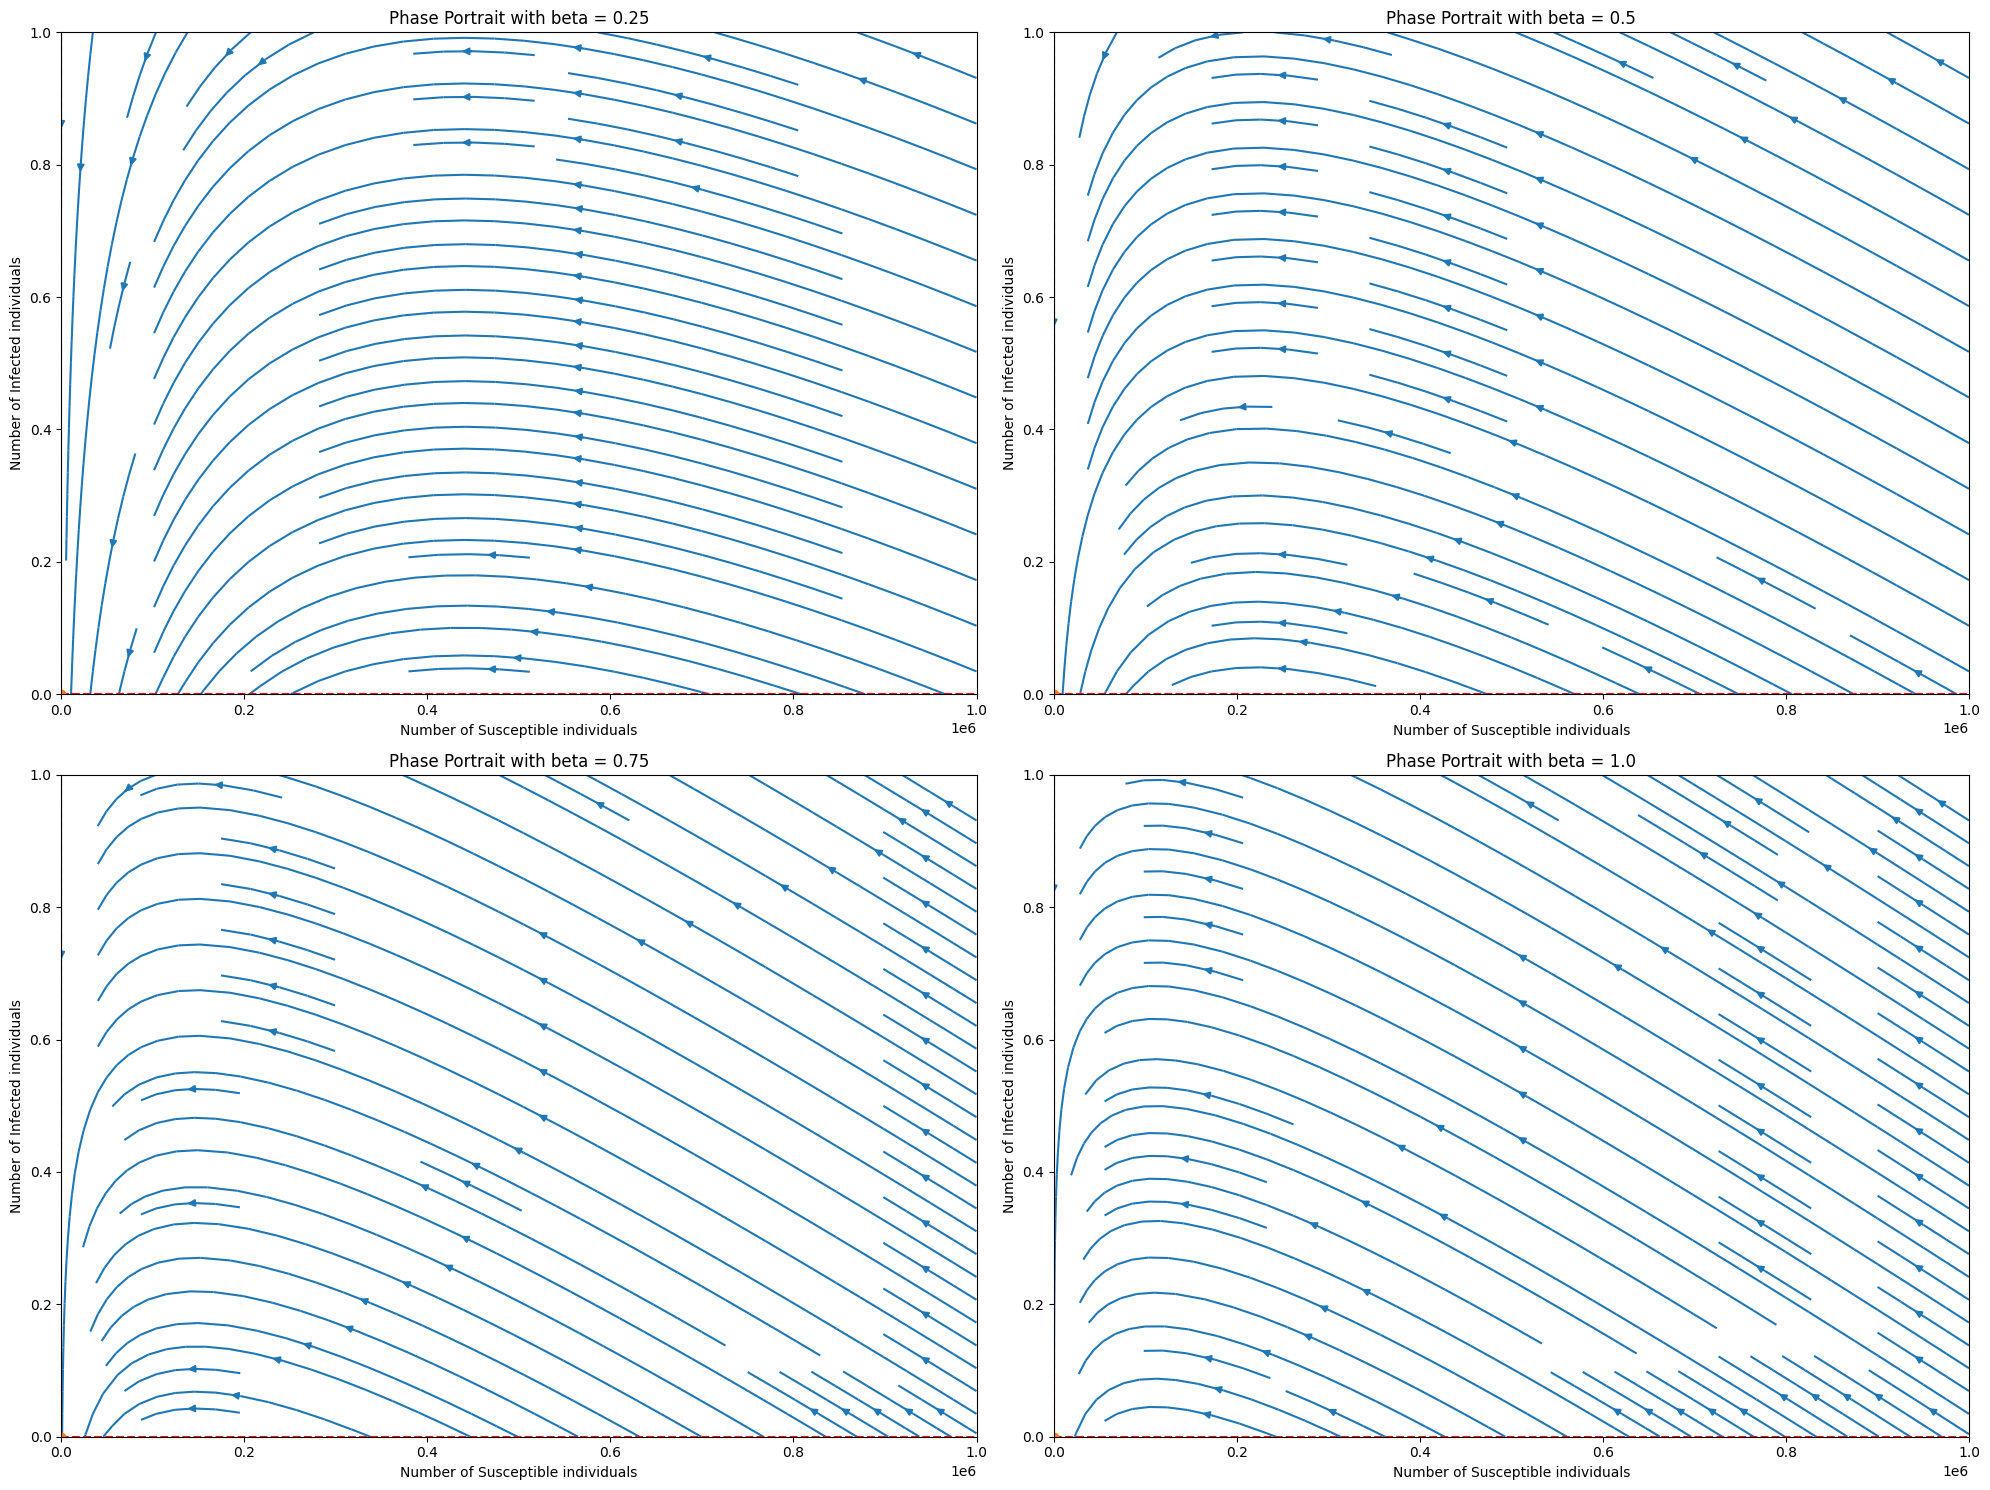

In [ ]:
# To define a function that returns the derivatives dS/dt and dI/dt at every point in the mesh:
def SIRD_Ode(S, I, beta, gamma, delta, N):
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I - delta * I
    return dSdt, dIdt

# Parameters
N = 1000000  # Total population
beta_list = [0.25, 0.5, 0.75, 1.00]  # Different values of beta to show different scenarios
gamma = 0.1  # Recovery rate
delta = 0.01  # Death rate

# Creating a meshgrid for S and I
S, I = np.meshgrid(np.linspace(0, N, 20), np.linspace(0, N, 20))

# Plotting the phase portraits for different values of beta
plt.figure(figsize=(20, 15))

for i, beta in enumerate(beta_list):
    # Compute derivatives for each point in the meshgrid
    dS, dI = SIRD_Ode(S, I, beta, gamma, delta, N)

    plt.subplot(2, 2, i+1)
    plt.streamplot(S, I/N, dS, dI/N)
    plt.title(f'Phase Portrait with beta = {beta}')
    plt.xlabel('Number of Susceptible individuals')
    plt.ylabel('Number of Infected individuals')
    plt.xlim(0, N)
    plt.ylim(0, 1)
    plt.axvline(color='r', ls='--')
    plt.axhline(color='r', ls='--')
    plt.plot(0, 0, 'o')  # Assuming no fixed points other than the origin for this model

plt.tight_layout()
plt.show()


###The dynamics of $S$ and $I$ in individual nodes:
## $\frac{dS}{dt[k]}=-{\beta S[k]} * \Sigma w[k] I + \psi R[k] $
## $\frac{dI}{dt[k]}={\beta S[k]} * \Sigma w[k] I - \gamma I[k] - \delta I[k]$
## $\frac{dR}{dt[k]}=\gamma I[k] - \psi R[k]$
## $\frac{dD}{dt[k]}=\delta I[k]$
###The k represents nodes.
###The K represents the total number of the nodes.
###w represents the adj matrix which shows the connection of each node.

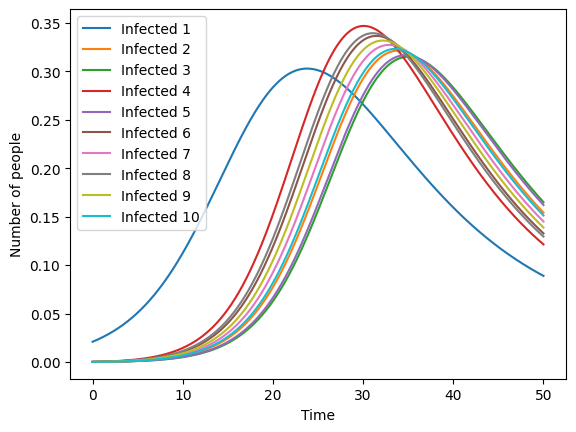

In [ ]:
import numpy as np
import scipy as sp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
def Node(y, t, N, beta, gamma, delta, Psi, w, K):
    S, I, R = y[:K], y[K:2*K], y[2*K:3*K]
    dSdt, dIdt, dRdt = np.zeros(K), np.zeros(K), np.zeros(K)
    for k in range(K):
        dSdt[k] = -beta * S[k] * np.dot(I, w[k]) + Psi * R[k]
        dIdt[k] = beta * S[k] * np.dot(I, w[k]) - delta * I[k] - gamma * I[k]
        dRdt[k] = gamma * I[k] - Psi * R[k]
    return np.concatenate((dSdt, dIdt, dRdt))
beta = 0.3   # Infection rate
gamma = 0.1  # Recovery rate
delta = 0.01  # Death rate
K = 10
Psi = 0.01
N = np.random.randint(20,100,K)
w = np.random.uniform(0, 1, (K, K))
for it in range(K):
    w[it,it]=1/N[it]
    for kt in range(it+1,K):
        w[it,kt]=1/(N[it]*N[kt])
        w[kt,it]=w[it,kt]

S_init = N
S_init[0] -= 1

I_init = np.zeros(K)
I_init[0] = 1

R_init = np.zeros(K)

initial_conditions = np.concatenate((S_init, I_init, R_init))

time = np.linspace(0, 50, 1000)

solution = sp.integrate.odeint(Node, initial_conditions, time, (N, beta, gamma, delta, Psi, w, K))

# Extracting S, I, and R from the solution
S = solution[:, :K]
I = solution[:, K:2*K]
R = solution[:, 2*K:3*K]

# Plotting

for i in range(K):
    #plt.plot(time, S[:, i], label=f'Susceptible {i+1}')
    plt.plot(time, I[:, i]/N[i], label=f'Infected {i+1}')
    #plt.plot(time, R[:, i], label=f'Recovered {i+1}')

plt.xlabel('Time')
plt.ylabel('Number of people')
plt.legend()
plt.show()

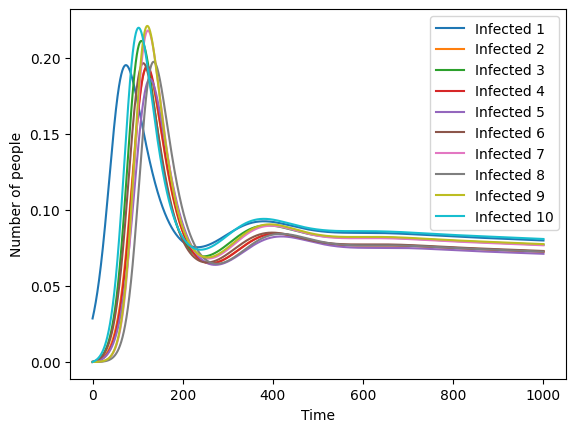

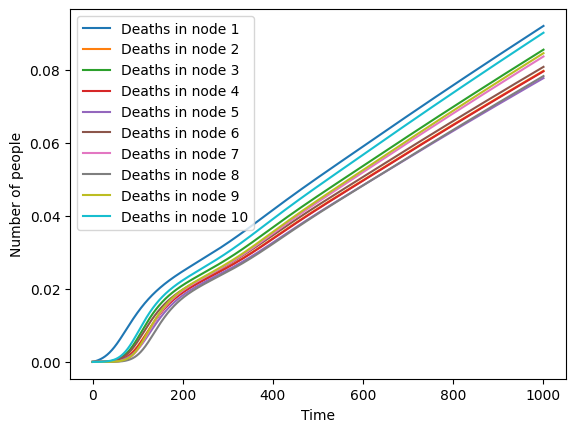

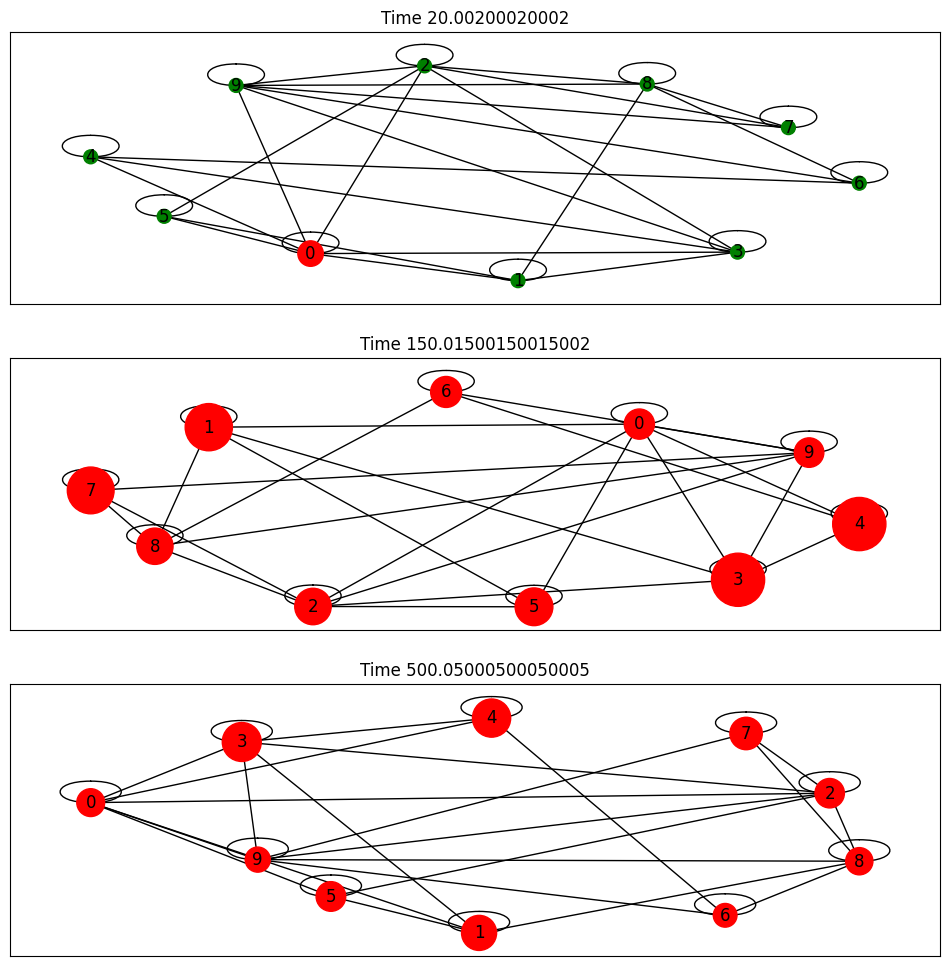

array([35, 68, 42, 87, 84, 45, 23, 56, 34, 26])

In [ ]:
import numpy as np
import scipy as sp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import networkx as nx

def Node(y, t, N, beta, gamma, delta, Psi, w, K):
    S, I, R, D = y[:K], y[K:2*K], y[2*K:3*K], y[3*K:4*K]
    dSdt, dIdt, dRdt, dDdt = np.zeros(K), np.zeros(K), np.zeros(K), np.zeros(K)
    for k in range(K):
        dSdt[k] = -beta * S[k] * np.dot(I, w[k]) + Psi * R[k]
        dIdt[k] = beta * S[k] * np.dot(I, w[k]) - delta * I[k] - gamma * I[k]
        dRdt[k] = gamma * I[k] - Psi * R[k]
        dDdt[k]= delta*I[k]
    return np.concatenate((dSdt, dIdt, dRdt,dDdt))

beta = 0.1
gamma = 0.05  # Recovery rate
delta = 0.001  # Death rate
K = 10
Psi = 0.01
N = np.random.randint(20,100,K)
w = np.zeros((K, K))
for it in range(K):
    w[it,it]=1/N[it]
    for kt in range(it+1,K):
        w[it,kt]=np.random.randint(0,2)/(N[it]*N[kt])
        w[kt,it]=w[it,kt]

S_init = N
S_init[0] -=1

I_init = np.zeros(K)
I_init[0] = 1

R_init = np.zeros(K)
D_init=np.zeros(K)

initial_conditions = np.concatenate((S_init, I_init, R_init,D_init))

time = np.linspace(0, 1000, 10000)

solution = sp.integrate.odeint(Node, initial_conditions, time, (N, beta, gamma, delta, Psi, w, K))

# Extracting S, I, and R from the solution
S = solution[:, :K]
I = solution[:, K:2*K]
R = solution[:, 2*K:3*K]
D = solution[:, 3*K:4*K]

# Plotting
plt.figure('I')
for i in range(K):
    #plt.plot(time, S[:, i], label=f'Susceptible {i+1}')
    plt.plot(time, I[:, i]/N[i], label=f'Infected {i+1}')
    #plt.plot(time, R[:, i], label=f'Recovered {i+1}')

plt.xlabel('Time')
plt.ylabel('Number of people')
plt.legend()
plt.show()

plt.figure('D')
for i in range(K):
    #plt.plot(time, S[:, i], label=f'Susceptible {i+1}')
    plt.plot(time, D[:, i]/N[i], label=f'Deaths in node {i+1}')
    #plt.plot(time, R[:, i], label=f'Recovered {i+1}')

plt.xlabel('Time')
plt.ylabel('Number of people')
plt.legend()
plt.show()

### GRAPH plotting
adj_mat=w

G = nx.Graph(adj_mat)
node_labels={1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i',10:'j'}

plt.figure(figsize=(12,12))
plt.subplot(3,1,1)

sizes=[]
colors=[]
for i in range(K):
    infected_sizes = solution[200, K+i]/N[i]
    if infected_sizes>0.05:
        sizes.append(100+100*infected_sizes*N[i])
        colors.append('red')
    else:
        sizes.append(100)
        colors.append('green')
nx.draw_networkx(G, with_labels=True, node_size=sizes,node_color=colors)
plt.title('Time '+str(time[200]))



# Plotting at time 10
plt.subplot(3,1, 2)
sizes=[]
colors=[]
for i in range(K):
    infected_sizes = solution[1500, K+i]/N[i]
    if infected_sizes>0.05:
        sizes.append(100+100*infected_sizes*N[i])
        colors.append('red')
    else:
        sizes.append(100)
        colors.append('green')
nx.draw_networkx(G, with_labels=True, node_size=sizes,node_color=colors)
plt.title('Time '+str(time[1500]))

# Plotting at time 100
plt.subplot(3, 1, 3)
sizes=[]
colors=[]
for i in range(K):
    infected_sizes = solution[5000, K+i]/N[i]
    if infected_sizes>0.05:
        sizes.append(100+100*infected_sizes*N[i])
        colors.append('red')
    else:
        sizes.append(100)
        colors.append('green')
nx.draw_networkx(G, with_labels=True, node_size=sizes,node_color=colors)
plt.title('Time '+str(time[5000]))
plt.show()
N
